In [81]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from Model import LSTMModel

In [82]:
# Load the model
def load_model(model_path, input_dim, hidden_dim, output_dim, num_layers):
    model = LSTMModel(input_dim, hidden_dim, output_dim, num_layers)
    checkpoint = torch.load(model_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    return model

In [83]:
# Hyperparameters (must match training)
SEQ_LENGTH = 60
INPUT_DIM = 3
HIDDEN_DIM = 50
OUTPUT_DIM = 3
NUM_LAYERS = 2

# File path for testing data
file_path = "activity_data_16.csv"  # Replace with new or test dataset
df = pd.read_csv(file_path, parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Load model
model = load_model("lstm_model.pth", INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM, NUM_LAYERS)

C:\Users\user\AppData\Local\Temp\ipykernel_11696\3959976594.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)
c:\Users\user\miniconda3\

In [84]:
# Create sequences
seq_length = 480
sequences = [scaled_data[:seq_length]]
X = torch.tensor(sequences, dtype=torch.float32)
for i in range(len(scaled_data) - seq_length):
    p = torch.tensor([model(X[:, 1:, :]).tolist()], dtype=torch.float32)
    X = torch.cat((X, p), 1)

In [85]:
# Inverse transform predictions and targets
predictions = scaler.inverse_transform(X.numpy()[0])
targets = scaler.inverse_transform(scaled_data)

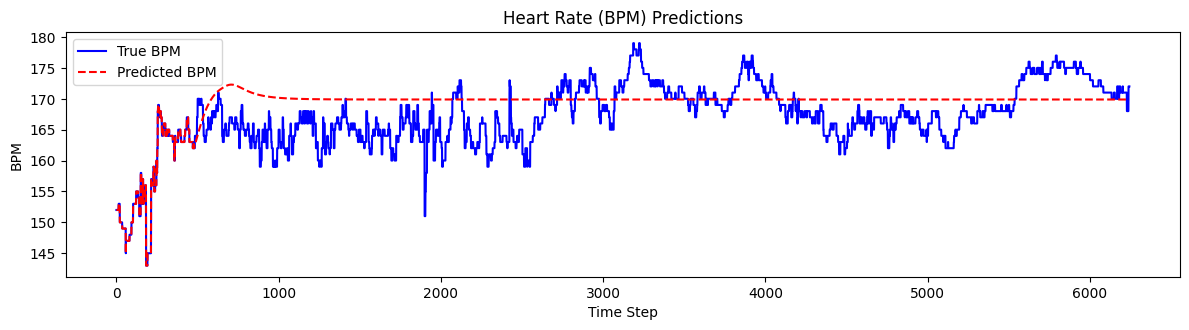

In [86]:


# Extract bpm and pace for plotting
true_bpm = targets[:, 2]  # Assuming bpm is the third column
pred_bpm = predictions[:, 2]


# Plot BPM predictions
plt.figure(figsize=(12, 6))

# BPM Plot
plt.subplot(2, 1, 1)
plt.plot(true_bpm, label="True BPM", color="blue")
plt.plot(pred_bpm, label="Predicted BPM", color="red", linestyle="--")
plt.title("Heart Rate (BPM) Predictions")
plt.xlabel("Time Step")
plt.ylabel("BPM")
plt.legend()

# Display plots
plt.tight_layout()
plt.show()


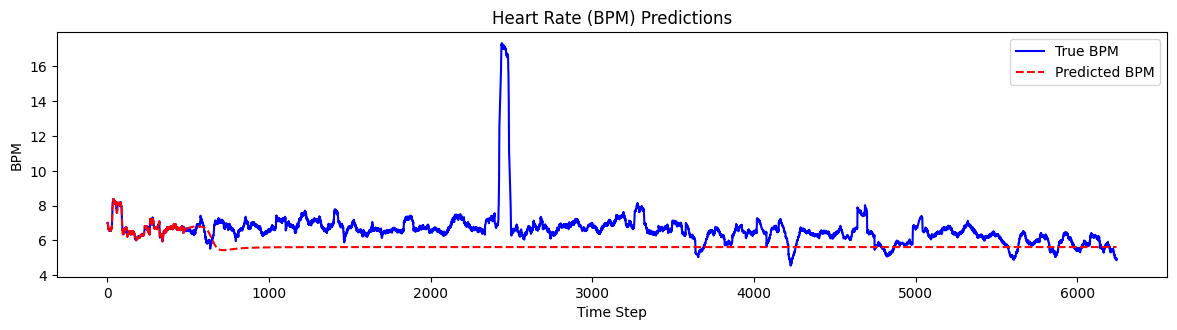

In [87]:

# Extract bpm and pace for plotting
true_bpm = targets[:, 0]  # Assuming bpm is the third column
pred_bpm = predictions[:, 0]


# Plot BPM predictions
plt.figure(figsize=(12, 6))

# BPM Plot
plt.subplot(2, 1, 1)
plt.plot(true_bpm, label="True BPM", color="blue")
plt.plot(pred_bpm, label="Predicted BPM", color="red", linestyle="--")
plt.title("Heart Rate (BPM) Predictions")
plt.xlabel("Time Step")
plt.ylabel("BPM")
plt.legend()

# Display plots
plt.tight_layout()
plt.show()
